# Derivatives Analytics with Python

**_Chapters 2 & 3_**

**Wiley Finance (2015)**

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

## Market-Based Valuation

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

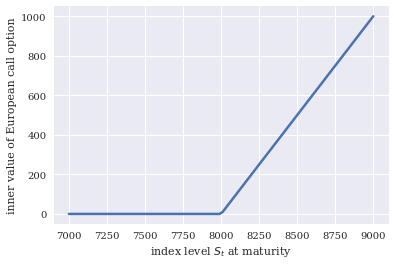

In [2]:
%run 02_mbv/inner_value_plot.py
plt.savefig('../images/02_mbv/call_inner_values.pdf')
plt.show()

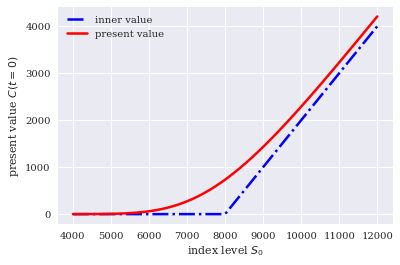

In [3]:
%run 02_mbv/BSM_value_plot.py
plt.savefig('../images/02_mbv/call_values.pdf')
plt.show()

## Market Stylized Facts

### Uncorrected Sample Standard Deviation

In [4]:
a = np.random.standard_normal(1000)

In [5]:
a.std()

1.0269578312301302

In [6]:
s = lambda x: np.sqrt(np.sum((x - x.mean()) ** 2) / len(x))

In [7]:
s(a)

1.0269578312301302

### Geometric Brownian Motion

In [8]:
%run 03_stf/GBM_returns.py

In [9]:
gbm = simulate_gbm()

In [10]:
print_statistics(gbm)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000073
Mean of Annua. Log Returns  0.018422
Std  of Annua. Log Returns  0.201944
---------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value    0.730950
---------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value    0.206628
---------------------------------------------
Normal Test p-value         0.424617
---------------------------------------------
Realized Volatility         0.201947
Realized Variance           0.040783


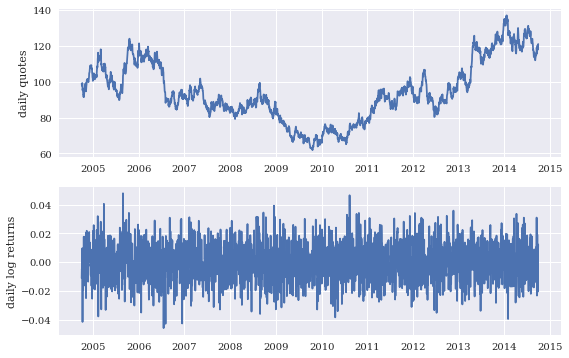

In [11]:
quotes_returns(gbm)
plt.savefig('../images/03_stf/GBM_quotes_returns.pdf')

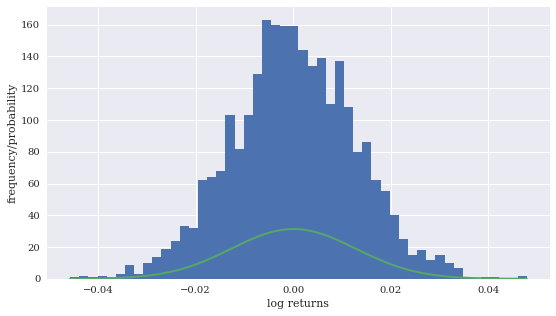

In [12]:
return_histogram(gbm)
plt.savefig('../images/03_stf/GBM_histogram.pdf')

<Figure size 648x360 with 0 Axes>

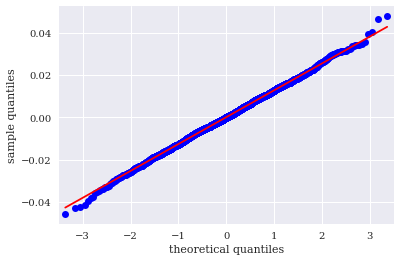

In [13]:
return_qqplot(gbm)
plt.savefig('../images/03_stf/GBM_qqplot.pdf')

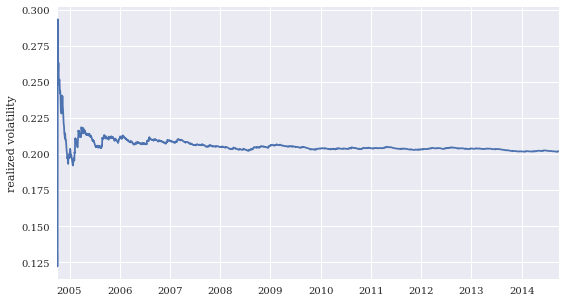

In [14]:
realized_volatility(gbm)
plt.savefig('../images/03_stf/GBM_realized_volatility.pdf')

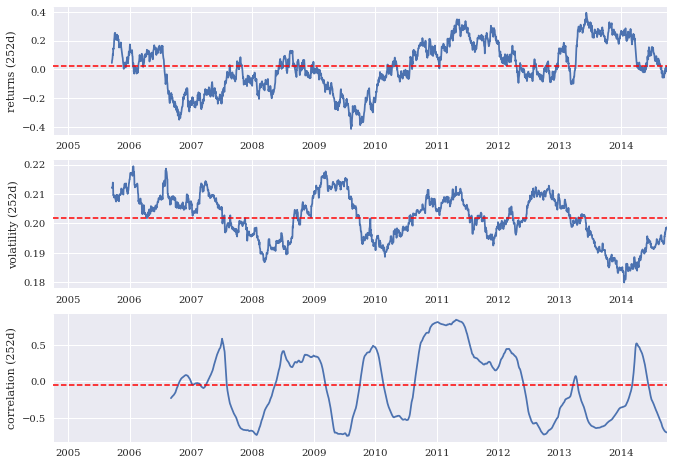

In [15]:
rolling_statistics(gbm)
plt.savefig('../images/03_stf/GBM_rolling_stats.pdf')

### DAX Index

In [16]:
%run 03_stf/DAX_returns.py

<Figure size 432x288 with 0 Axes>

In [17]:
DAX = read_dax_data()

In [18]:
print_statistics(DAX)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000254
Mean of Annua. Log Returns  0.063987
Std  of Annua. Log Returns  0.218582
---------------------------------------------
Skew of Sample Log Returns  0.036871
Skew Normal Test p-value    0.449487
---------------------------------------------
Kurt of Sample Log Returns  7.300400
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.214515
Realized Variance           0.046017


In [19]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2004-10-01 to 2014-09-30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    2511 non-null   float64
 1   returns  2511 non-null   float64
 2   rea_var  2511 non-null   float64
 3   rea_vol  2511 non-null   float64
dtypes: float64(4)
memory usage: 98.1 KB


In [20]:
DAX[['index', 'returns', 'rea_var', 'rea_vol']].tail()

,index,returns,rea_var,rea_vol
Date,,,,
2014-09-24,9661.97,0.006952,0.046055,0.214604
2014-09-25,9510.01,-0.015853,0.046061,0.214619
2014-09-26,9490.55,-0.002048,0.046044,0.214579
2014-09-29,9422.91,-0.007153,0.046031,0.214549
2014-09-30,9474.30,0.005439,0.046017,0.214515


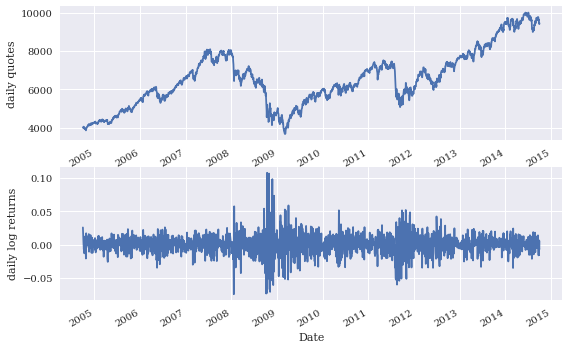

In [21]:
quotes_returns(DAX)
plt.savefig('../images/03_stf/DAX_quotes_returns.pdf')

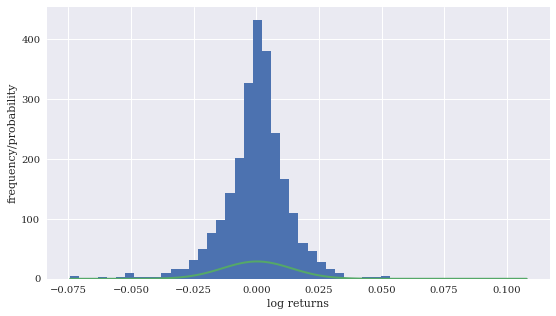

In [22]:
return_histogram(DAX)
plt.savefig('../images/03_stf/DAX_histogram.pdf')

<Figure size 648x360 with 0 Axes>

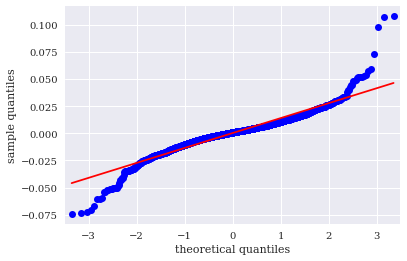

In [23]:
return_qqplot(DAX)
plt.savefig('../images/03_stf/DAX_qqplot.pdf')

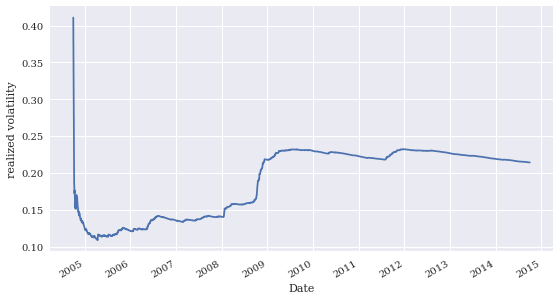

In [24]:
realized_volatility(DAX)
plt.savefig('../images/03_stf/DAX_realized_volatility.pdf')

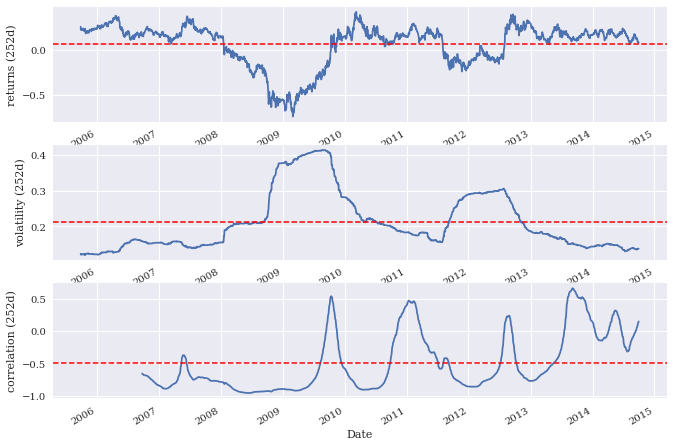

In [25]:
rolling_statistics(DAX)
plt.savefig('../images/03_stf/DAX_rolling_stats.pdf')

In [26]:
count_jumps(DAX, 0.05)

32

In [27]:
count_jumps(gbm, 0.05)

0

In [28]:
0.0002911 * len(DAX)

0.7309520999999999

In [29]:
0.0003402 * len(DAX)

0.8542422

## Implied Volatilities

In [32]:
%run 03_stf/ES50_imp_vol.py

In [33]:
mats = sorted(set(data['Maturity']))

In [34]:
pd.DatetimeIndex(mats)

DatetimeIndex(['2014-10-17', '2014-11-21', '2014-12-19', '2015-03-20',
               '2015-06-19', '2015-09-18', '2015-12-18', '2016-06-17',
               '2016-12-16'],
              dtype='datetime64[ns]', freq=None)

In [35]:
dat = data[(data.Maturity == mats[0])
        | (data.Maturity == mats[2])
        | (data.Maturity == mats[3])]

In [36]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 466
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      164 non-null    datetime64[ns]
 1   Strike    164 non-null    float64       
 2   Call      164 non-null    float64       
 3   Maturity  164 non-null    datetime64[ns]
 4   Put       164 non-null    float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 7.7 KB


In [37]:
h5 = pd.HDFStore('08_m76/option_data.h5', 'w')
h5['data'] = dat
h5.close()

In [38]:
data.tail()

,Date,Strike,Call,Maturity,Put
498,2014-09-30,3750.0,27.4,2015-09-18,635.9
499,2014-09-30,3800.0,21.8,2015-09-18,680.3
500,2014-09-30,3850.0,17.2,2015-09-18,725.7
501,2014-09-30,3900.0,13.4,2015-09-18,772.0
502,2014-09-30,3950.0,10.4,2015-09-18,818.9


In [39]:
data['Date'] = pd.DatetimeIndex(data['Date'])
data['Maturity'] = pd.DatetimeIndex(data['Maturity'])

In [40]:
data.tail()

,Date,Strike,Call,Maturity,Put
498,2014-09-30,3750.0,27.4,2015-09-18,635.9
499,2014-09-30,3800.0,21.8,2015-09-18,680.3
500,2014-09-30,3850.0,17.2,2015-09-18,725.7
501,2014-09-30,3900.0,13.4,2015-09-18,772.0
502,2014-09-30,3950.0,10.4,2015-09-18,818.9


In [41]:
data = calculate_imp_vols(data)

In [42]:
S0

3225.93

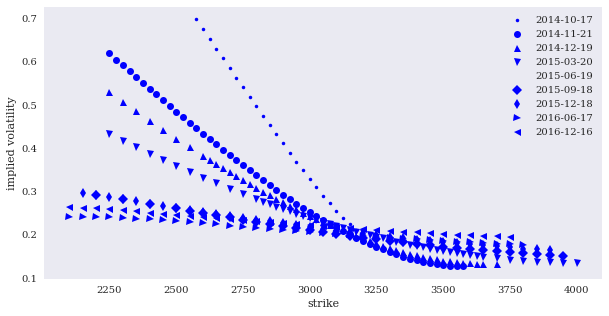

In [43]:
plot_imp_vols(data)
plt.savefig('../images/03_stf/ES50_implied_volatilities.pdf')

## Interest Rates

In [44]:
%run 03_stf/EURIBOR_analysis.py

<Figure size 432x288 with 0 Axes>

In [45]:
EBO = read_euribor_data()

/home/kissami/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
EBO.tail()

,1w,2w,1m,2m,3m,6m,9m,12m,returns
2014-09-22,-0.016,-0.012,0.005,0.044,0.082,0.186,0.257,0.345,-0.362905
2014-09-23,-0.014,-0.012,0.005,0.042,0.082,0.185,0.257,0.343,-0.133531
2014-09-24,-0.006,-0.005,0.007,0.043,0.083,0.186,0.257,0.344,-0.847298
2014-09-25,-0.007,-0.006,0.006,0.042,0.082,0.183,0.254,0.342,0.154151
2014-09-30,-0.013,-0.013,0.007,0.043,0.083,0.183,0.251,0.338,0.367725


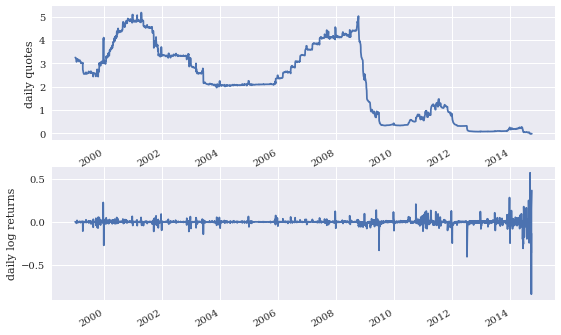

In [47]:
quotes_returns(EBO.rename(columns={'1w' : 'index'}))
plt.savefig('../images/03_stf/EBO_quotes_returns.pdf')

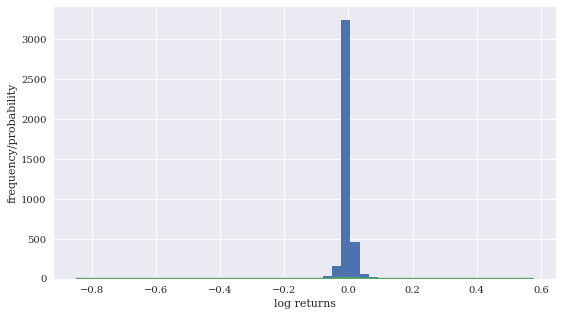

In [48]:
return_histogram(EBO)
plt.savefig('../images/03_stf/EBO_histogram.pdf')

<Figure size 648x360 with 0 Axes>

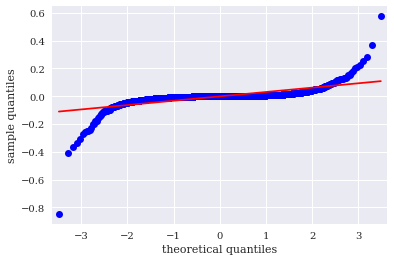

In [49]:
return_qqplot(EBO)
plt.savefig('../images/03_stf/EBO_qqplot.pdf')

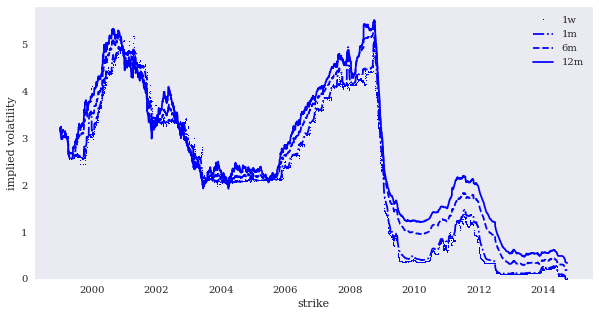

In [50]:
plot_term_structure(EBO)
plt.savefig('../images/03_stf/EBO_term_structure.pdf')